In [2]:

import os
#os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from geopandas import GeoSeries
from shapely.geometry import LineString

# ... [rest of the code for the function and plotting]


c:\ProgramData\Anaconda3\envs\Geol\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\ProgramData\Anaconda3\envs\Geol\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
c:\ProgramData\Anaconda3\envs\Geol\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# gdf = gpd.read_file('E:\Data\CHapter 2\Site1\Output_Rectangle\Median_Case_Site1.gpkg')
gdf = gpd.read_file('E:\Paper2OUTPUTMODELS\Bedded\VarCav_MyDat\P50_VarCav_MyDat.gpkg')


C:\Users\c0063859\AppData\Local\Temp\ipykernel_18680\1204339747.py:42: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


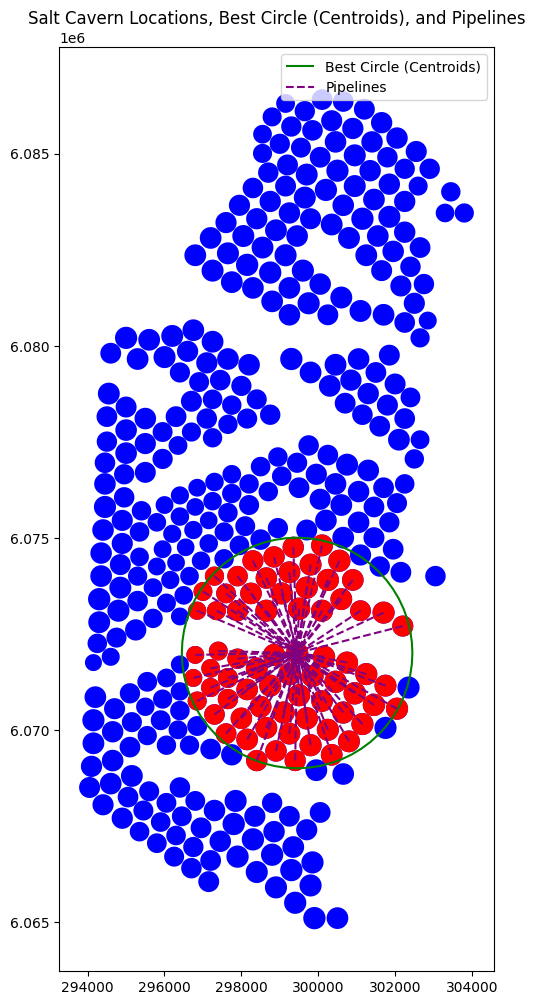

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString


def compute_sum_with_centroids_within_circle(center, radius, gdf):
    """Computes the sum of 'H2_E_GWh_TM' for all centroids of polygons within a circle of the given radius."""
    circle = center.buffer(radius)
    centroids_within_circle = gdf[gdf.centroid.intersects(circle)]
    return centroids_within_circle['H2_E_GWh_TM'].sum()

radius = 3000  # 1.5km, which is half of the diameter

# 2. Modify the circle-based clustering to consider only the centroids of the polygons
sums_centroids = gdf.apply(lambda row: compute_sum_with_centroids_within_circle(Point(row['X'], row['Y']), radius, gdf), axis=1)
max_index_centroids = sums_centroids.idxmax()
best_center_centroids = Point(gdf.loc[max_index_centroids, 'X'], gdf.loc[max_index_centroids, 'Y'])
best_circle_centroids = best_center_centroids.buffer(radius)
caverns_within_best_circle = gdf[gdf.centroid.intersects(best_circle_centroids)]
pipelines = caverns_within_best_circle.centroid.apply(lambda x: LineString([x, best_center_centroids]))
# Convert the pipelines GeoSeries to a GeoDataFrame
pipelines_gdf = gpd.GeoDataFrame({'geometry': pipelines})
# Compute the length of each pipeline and add it as a new column to the GeoDataFrame
pipelines_gdf['length'] = pipelines_gdf['geometry'].length.round().astype(int)
circle_gdf = gpd.GeoDataFrame({'geometry': [best_circle_centroids]}, crs=gdf.crs)

# Display the updated GeoDataFrame
pipelines_gdf.head()


# Display the resulting GeoDataFrame
pipelines_gdf.head()


# 3. Visualize the results
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, markersize=10, color='blue', label='Salt Cavern Locations')
caverns_within_best_circle.plot(ax=ax, markersize=10, color='red', label='Caverns with Centroids within Best Circle')
gpd.GeoSeries(best_circle_centroids.boundary).plot(ax=ax, color='green', linewidth=1.5, label='Best Circle (Centroids)')
gpd.GeoSeries(pipelines).plot(ax=ax, color='purple', linestyle='--', label='Pipelines')
ax.set_title("Salt Cavern Locations, Best Circle (Centroids), and Pipelines")
ax.legend()
plt.show()


In [6]:
pipelines_gdf

,geometry,length
199,"LINESTRING (298754.542 6071157.619, 300104.542...",1408
218,"LINESTRING (299104.542 6070457.619, 300104.542...",1044
224,"LINESTRING (299254.542 6069907.619, 300104.542...",1202
225,"LINESTRING (299254.542 6071457.619, 300104.542...",1101
237,"LINESTRING (299454.542 6072007.619, 300104.542...",1409
240,"LINESTRING (299504.542 6070907.619, 300104.542...",618
248,"LINESTRING (299704.542 6070307.619, 300104.542...",602
255,"LINESTRING (299804.542 6069607.619, 300104.542...",1188
260,"LINESTRING (299854.542 6071407.619, 300104.542...",696
269,"LINESTRING (300104.542 6070757.619, 300104.542...",0


In [10]:
circle_gdf.to_file("E:\Paper2OUTPUTMODELS\Bedded\VarCav_MyDat\concepts\Cluster_ConceptsPLAY_MAX_H2_Circle3000mrad.gpkg")
pipelines_gdf.to_file("E:\Paper2OUTPUTMODELS\Bedded\VarCav_MyDat\concepts\Cluster_ConceptsPLAY_MAX_H2_Pieplines3000mrad.gpkg")
caverns_within_best_circle.to_file("E:\Paper2OUTPUTMODELS\Bedded\VarCav_MyDat\concepts\Cluster_ConceptsPLAY_MAX_H2_Caverns3000mrad.gpkg")

In [9]:
circle_gdf

,geometry
0,"POLYGON ((302704.542 6070507.619, 302697.319 6..."


In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

def count_centroids_within_circle(center, radius, gdf):
    """Counts the centroids of polygons within a circle of the given radius."""
    circle = center.buffer(radius)
    centroids_within_circle = gdf[gdf.centroid.intersects(circle)]
    return len(centroids_within_circle)

radius = 3000  # 1.5km, which is half of the diameter

# Compute the number of centroids within each potential circle
counts_centroids_B = gdf.apply(lambda row: count_centroids_within_circle(Point(row['X'], row['Y']), radius, gdf), axis=1)

# Find the circle that maximizes this count
max_index_count_B = counts_centroids_B.idxmax()
best_center_count_B = Point(gdf.loc[max_index_count_B, 'X'], gdf.loc[max_index_count_B, 'Y'])
best_circle_count_B = best_center_count_B.buffer(radius)

# Identify the caverns whose centroids are within the best circle based on count
caverns_within_best_circle_count_B = gdf[gdf.centroid.intersects(best_circle_count_B)]

# Create lines from the centroids of each cavern to the centroid of the best circle based on count
pipelines_count_B = caverns_within_best_circle_count_B.centroid.apply(lambda x: LineString([x, best_center_count_B]))

# Create a GeoDataFrame for the 3km circle based on maximum count of centroids
best_circle_count_gdf_B = gpd.GeoDataFrame({'geometry': [best_circle_count_B]}, crs=gdf.crs)


In [14]:
best_circle_count_gdf_B.to_file("E:\Paper2OUTPUTMODELS\Bedded\VarCav_MyDat\concepts\PLAY_MAX_CAVERNS_Circle3000m.gpkg")
pipelines_count_B.to_file('E:\Paper2OUTPUTMODELS\Bedded\VarCav_MyDat\concepts\PLAY_MAX_CAVERNS_PIPELINE3000m.gpkg')
caverns_within_best_circle_count_B.to_file("E:\Paper2OUTPUTMODELS\Bedded\VarCav_MyDat\concepts\PLAY_MAX_CAVERN_CAVERNS3000m.gpkg")

In [15]:
import geopandas as gpd
import pyproj


# Convert DMS to DD
def dms_to_dd(d, m, s):
    return d + m/60 + s/3600

latitude_dd = dms_to_dd(54, 51, 8.94)
longitude_dd = -dms_to_dd(0, 8, 45.93)  # Negative for West

# Define the source CRS (ED50) and the target CRS (EPSG:32631)
source_crs = pyproj.CRS("EPSG:4230")  # ED50
target_crs = gdf.crs

# Transform the coordinates
transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)
x_C, y_C = transformer.transform(longitude_dd, latitude_dd)

# Create the center point in the target CRS
center_point_C = Point(x_C, y_C)

radius = 1500  # 1.5km, which is half of the diameter

# Create a 3km circle around the new center point
best_circle_custom_C = center_point_C.buffer(radius)

# Identify the caverns whose centroids are within this circle
caverns_within_custom_circle_C = gdf[gdf.centroid.intersects(best_circle_custom_C)]

# Create lines from the centroids of each cavern to the centroid of the custom circle
pipelines_custom_C = caverns_within_custom_circle_C.centroid.apply(lambda x: LineString([x, center_point_C]))

# Create a GeoDataFrame for the 3km circle based on the custom center point
best_circle_custom_gdf_C = gpd.GeoDataFrame({'geometry': [best_circle_custom_C]}, crs=gdf.crs)


In [16]:
best_circle_custom_gdf_C.to_file("E:\Paper2OUTPUTMODELS\Bedded\VarCav_MyDat\concepts\PLAY_WELL_Circle.gpkg")
pipelines_custom_C.to_file("E:\Paper2OUTPUTMODELS\Bedded\VarCav_MyDat\concepts\PLAY_WELL_Pipeline.gpkg")
caverns_within_custom_circle_C.to_file("E:\Paper2OUTPUTMODELS\Bedded\VarCav_MyDat\concepts\PLAY_WELL_Caverns.gpkg")

In [33]:
Scenario_A_H2_SUM = caverns_within_best_circle['H2_E_GWh_TM'].sum()
Scenario_B_H2_SUM = caverns_within_best_circle_count_B['H2_E_GWh_TM'].sum()
Scenario_C_H2_SUM = caverns_within_custom_circle_C['H2_E_GWh_TM'].sum()

In [44]:
caverns_within_best_circle_count_B

,X,Y,thickness,Depth,Base,thick_avail,cav_top,def_hanging_wall,height_to_diameter_ratio,max_cavern_height,...,Z_Topstass,gfg,cav_mid_temp,insolubles%,act_cav_vol,obp4z2,obp,H2_Mass_ton_TM,H2_E_GWh_TM,geometry
12,294404.5422,6.075208e+06,354.361607,1616.695168,1971.056775,354.361607,1616.695168,0.0,1.571808,220.868684,...,1616.695168,33.616569,59.004921,0.851963,2.299333e+06,0.564988,39.256831,39574.309476,1318.703935,"POLYGON ((294685.580 6075207.619, 294684.227 6..."
13,294454.5422,6.075808e+06,385.283868,1600.388797,1985.672666,385.283868,1600.388797,0.0,1.726419,248.526646,...,1600.388797,45.201198,79.257730,0.905654,2.956040e+06,0.578804,38.873379,47483.506874,1582.255968,"POLYGON ((294742.452 6075807.619, 294741.066 6..."
14,294454.5422,6.076408e+06,352.545450,1615.818874,1968.364325,352.545450,1615.818874,0.0,1.562727,219.256739,...,1615.818874,37.969226,66.579342,0.957015,2.552166e+06,0.564124,39.159693,42839.820647,1427.518024,"POLYGON ((294735.150 6076407.619, 294733.799 6..."
15,294454.5422,6.076958e+06,302.951921,1590.820233,1893.772154,302.951921,1590.820233,0.0,1.314760,175.872506,...,1590.820233,44.091305,75.198164,0.861892,1.590213e+06,0.537844,38.473673,25576.033686,852.250278,"POLYGON ((294722.078 6076957.619, 294720.790 6..."
28,294854.5422,6.074308e+06,323.238826,1675.655594,1998.894420,323.238826,1675.655594,0.0,1.416194,193.462118,...,1675.655594,37.895483,68.200806,0.979817,2.124355e+06,0.549260,40.682852,36869.668873,1228.579299,"POLYGON ((295127.756 6074307.619, 295126.441 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,299704.5422,6.075208e+06,322.554805,1599.348205,1921.903011,322.554805,1599.348205,0.0,1.412774,192.865270,...,1599.348205,38.907733,67.041289,0.953351,2.056296e+06,0.548891,38.570085,33950.435413,1131.303953,"POLYGON ((299977.573 6075207.619, 299976.258 6..."
252,299754.5422,6.077408e+06,298.371081,1567.723134,1866.094215,298.371081,1567.723134,0.0,1.291855,171.934503,...,1567.723134,44.643009,75.014032,0.844699,1.499138e+06,0.535123,37.811414,23708.741797,790.027963,"POLYGON ((300020.724 6077407.619, 300019.443 6..."
264,299954.5422,6.076658e+06,334.454342,1568.080541,1902.534883,334.454342,1568.080541,0.0,1.472272,203.283416,...,1568.080541,39.513404,67.067570,0.871538,2.052194e+06,0.555160,37.824561,33225.212985,1107.137930,"POLYGON ((300230.692 6076657.619, 300229.362 6..."
266,300054.5422,6.076008e+06,328.148159,1586.739283,1914.887441,328.148159,1586.739283,0.0,1.440741,197.753115,...,1586.739283,46.420857,79.522058,0.998399,2.245505e+06,0.551877,38.288959,35501.115465,1182.976059,"POLYGON ((300329.058 6076007.619, 300327.736 6..."


In [34]:
print(Scenario_A_H2_SUM)
print(Scenario_B_H2_SUM)
print(Scenario_C_H2_SUM)

91840.53939577626
66366.9878098393
23413.053772956926


In [38]:
pipelines_gdf_B = gpd.GeoDataFrame({'geometry': pipelines_count_B})
pipelines_gdf_B['length'] = pipelines_gdf_B['geometry'].length.round().astype(int)

In [39]:
pipelines_gdf_C = gpd.GeoDataFrame({'geometry': pipelines_custom_C})
pipelines_gdf_C['length'] = pipelines_gdf_C['geometry'].length.round().astype(int)

In [40]:
pipelines_gdf_TOT_L = pipelines_gdf['length'].sum()
pipelines_gdf_B_TOT_L = pipelines_gdf_B['length'].sum()
pipelines_gdf_C_TOT_L = pipelines_gdf_C['length'].sum()

In [41]:
print(pipelines_gdf_TOT_L)
print(pipelines_gdf_B_TOT_L)
print(pipelines_gdf_C_TOT_L)

146818
178183
17205


In [29]:
print(pipelines_gdf_TOT_L)

17688


In [35]:
gdf = gpd.read_file('E:\Paper2OUTPUTMODELS\CASE_STUDY_1\P50_CS_1.gpkg')
gdf1 = gpd.read_file('E:\Paper2OUTPUTMODELS\CASE_STUDY_1\P90_CS_1.gpkg')
gdf2 = gpd.read_file('E:\Paper2OUTPUTMODELS\CASE_STUDY_1\P10_CS_1.gpkg')

In [6]:
gdf2

,X,Y,thickness,Depth,height_to_diameter_ratio,max_cavern_height,cavern_diameter,footwall,hangingwall,heightcheck,...,cav_top_depth,cav_mid_depth,cav_mid_temp,insolubles%,act_cav_vol,obp4z2,obp,H2_Mass_ton_TM,H2_E_GWh_TM,geometry
0,294154.5422,6.068308e+06,387.255631,1478.362023,1.360,227.994657,167.643130,125.732348,33.528626,387.255631,...,1511.890649,1625.887978,62.079073,0.794855,5.333506e+06,0.674047,35.809203,82966.146415,2764.616368,"POLYGON ((294489.828 6068307.619, 294488.214 6..."
1,294154.5422,6.069008e+06,403.744542,1476.485617,1.410,241.220256,171.078196,128.308647,34.215639,403.744542,...,1510.701256,1631.311384,58.982803,0.908275,6.715050e+06,0.687859,35.791380,105378.698327,3511.452403,"POLYGON ((294496.699 6069007.619, 294495.051 6..."
2,294204.5422,6.069708e+06,380.662305,1484.670449,1.341,222.814558,166.155524,124.616643,33.231105,380.662305,...,1517.901554,1629.308833,75.459460,0.832684,5.363918e+06,0.668066,36.001032,80665.087889,2687.939984,"POLYGON ((294536.853 6069707.619, 294535.253 6..."
3,294204.5422,6.070408e+06,354.006031,1492.935840,1.261,201.900319,160.111276,120.083457,32.022255,354.006031,...,1524.958095,1625.908255,61.018572,0.901699,4.887323e+06,0.643764,36.168534,77032.168898,2566.883050,"POLYGON ((294524.765 6070407.619, 294523.223 6..."
4,294354.5422,6.071908e+06,524.083449,1505.837591,1.770,341.039598,192.677739,144.508304,38.535548,524.083449,...,1544.373139,1714.892938,58.845379,0.883868,1.171883e+07,0.774704,36.609583,188184.528895,6270.726691,"POLYGON ((294739.898 6071907.619, 294738.042 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,305654.5422,6.075408e+06,363.497082,1646.233080,1.289,209.266520,162.347960,121.760970,32.469592,363.497082,...,1678.702672,1783.335932,92.330993,0.930852,5.376538e+06,0.652757,39.743569,85138.072077,2836.989757,"POLYGON ((305979.238 6075407.619, 305977.675 6..."
367,305654.5422,6.076408e+06,346.793700,1634.914055,1.239,196.289353,158.425628,118.819221,31.685126,346.793700,...,1666.599180,1764.743857,81.162547,0.927653,4.785879e+06,0.636986,39.433524,77564.935664,2584.636023,"POLYGON ((305971.393 6076407.619, 305969.868 6..."
368,305804.5422,6.073908e+06,413.017263,1642.599804,1.438,248.709725,172.955303,129.716477,34.591061,413.017263,...,1677.190865,1801.545727,89.086697,0.994041,7.744503e+06,0.695406,39.731320,123695.729221,4121.816577,"POLYGON ((306150.453 6073907.619, 306148.787 6..."
369,305804.5422,6.077058e+06,338.144808,1653.418686,1.213,189.629983,156.331395,117.248546,31.266279,338.144808,...,1684.684965,1779.499956,57.563479,0.965542,4.685967e+06,0.628566,39.880981,82290.727665,2742.109914,"POLYGON ((306117.205 6077057.619, 306115.699 6..."


In [36]:
import pandas as pd

# Assuming gdf, gdf1, and gdf2 are already defined
# For example:
# gdf = pd.DataFrame({'H2_E_GWh_TM': [1, 2, 3]})
# gdf1 = pd.DataFrame({'H2_E_GWh_TM': [4, 5, 6]})
# gdf2 = pd.DataFrame({'H2_E_GWh_TM': [7, 8, 9]})

mean_gdf = gdf['H2_E_GWh_TM'].mean()
mean_gdf1 = gdf1['H2_E_GWh_TM'].mean()
mean_gdf2 = gdf2['H2_E_GWh_TM'].mean()




In [39]:
mean_gdf2

942.1688942235713